# Обучаем первые классификаторы в sklearn

### Данные


По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response).

Для демонстрации используется обучающая выборка из исходных данных bioresponse.csv, файл с данными прилагается.

### Готовим обучающую и тестовую выборки

In [1]:
import pandas as pd

bioresponce = pd.read_csv('bioresponse.csv', header=0, sep=',')

In [2]:
bioresponce.head(5)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = bioresponce.Activity.values

In [4]:
X = bioresponce.iloc[:, 1:]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Строим модель и оцениваем качество

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [8]:
type(preds)

numpy.ndarray

In [9]:
10 // 9

1

In [10]:
print(sum(preds == y_test) / len(preds))

0


In [11]:
print(sum(preds == y_test) / float(len(preds)))

0.75605815832


In [12]:
from sklearn.metrics import accuracy_score

print(accuracy_score(preds, y_test))

0.75605815832


### Качество на кросс-валидации

In [13]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(model, X_train, y_train, cv=5))

[ 0.74404762  0.73956262  0.72310757  0.75099602  0.75896414]


In [14]:
print(cross_val_score(model, X_train, y_train, cv=5).mean())

0.743335594477


### Пробуем другие классификаторы

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [20]:
%%time

models = [
    KNeighborsClassifier(n_jobs=-1),
    DecisionTreeClassifier(),
    LinearSVC(),
    RandomForestClassifier(n_estimators=100,n_jobs=-1), 
    GradientBoostingClassifier(n_estimators=100)
]

for model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(accuracy_score(preds, y_test), model)

(0.71890145395799676, KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))
(0.70597738287560585, DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))
(0.7423263327948304, LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))
(0.79563812600969308, RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            mi

## Опциональное задание:

Попробуйте разные классификаторы с разными параметрами и постарайтесь добиться максимального качества на тестовой выборке

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grids = [
               {'n_neighbors': [1, 3, 5, 10], 'p': [1, 2, 3], },
               {'criterion': ['gini', 'entropy'], 'max_depth': [3,5,7, None]},
               {'C': [0.1, 1.0, 10.0], 'max_iter': [100, 1000, 2000]},
               {'max_depth': [3, 5, 7, None], 'n_estimators': [10, 50, 100, 500]},
               {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [10, 50, 100, 500]}
              ]

In [24]:
results = []
for model, params in zip(models, param_grids):
    clf = GridSearchCV(model, params, n_jobs=-1, verbose=1, cv=3)
    clf.fit(X_train, y_train)
    results.append([clf, clf.cv_results_])

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 47.6min finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   12.0s finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   36.8s finished


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.0min finished


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 10.0min finished


In [25]:
from scipy.stats import randint, geom, pareto,expon

In [51]:
param_dists = [
                {'n_neighbors': geom(p=0.75), 'p': randint(1,10) },
                {"max_depth": geom(p=0.5, loc=2), 'min_weight_fraction_leaf': expon(scale=0.001)},
                {'C': expon(scale=10), 'max_iter': randint(100, 3000)},
                {'max_depth': geom(p=0.5, loc=2), 'n_estimators': geom(p=0.02, loc=10)},
                {'learning_rate': expon(scale=0.01), 'n_estimators': geom(p=0.1, loc=10)}
              ]

In [53]:
random_results = []
for model, params in zip(models[1:], param_dists[1:]):
    clf = RandomizedSearchCV(model, params, n_jobs=1, verbose=2, cv=3, n_iter=15)
    clf.fit(X_train, y_train)
    random_results.append([clf, clf.cv_results_])

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] min_weight_fraction_leaf=0.000326956776449, max_depth=4 .........
[CV]  min_weight_fraction_leaf=0.000326956776449, max_depth=4, total=   0.4s
[CV] min_weight_fraction_leaf=0.000326956776449, max_depth=4 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  min_weight_fraction_leaf=0.000326956776449, max_depth=4, total=   0.4s
[CV] min_weight_fraction_leaf=0.000326956776449, max_depth=4 .........
[CV]  min_weight_fraction_leaf=0.000326956776449, max_depth=4, total=   0.4s
[CV] min_weight_fraction_leaf=0.00147973423571, max_depth=3 ..........
[CV]  min_weight_fraction_leaf=0.00147973423571, max_depth=3, total=   0.3s
[CV] min_weight_fraction_leaf=0.00147973423571, max_depth=3 ..........
[CV]  min_weight_fraction_leaf=0.00147973423571, max_depth=3, total=   0.3s
[CV] min_weight_fraction_leaf=0.00147973423571, max_depth=3 ..........
[CV]  min_weight_fraction_leaf=0.00147973423571, max_depth=3, total=   0.3s
[CV] min_weight_fraction_leaf=0.000711017547341, max_depth=8 .........
[CV]  min_weight_fraction_leaf=0.000711017547341, max_depth=8, total=   0.7s
[CV] min_weight_fraction_leaf=0.000711017547341, max_depth=8 .........
[CV]  min_weight_fraction_leaf=0.000711017547341, max_depth=8, total=   0.7s
[CV] min_weight_fraction_leaf=0.000711

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   19.3s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] C=18.2276071432, max_iter=1403 ..................................
[CV] ................... C=18.2276071432, max_iter=1403, total=   3.2s
[CV] C=18.2276071432, max_iter=1403 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV] ................... C=18.2276071432, max_iter=1403, total=   3.3s
[CV] C=18.2276071432, max_iter=1403 ..................................
[CV] ................... C=18.2276071432, max_iter=1403, total=   3.4s
[CV] C=7.80769732887, max_iter=954 ...................................
[CV] .................... C=7.80769732887, max_iter=954, total=   2.4s
[CV] C=7.80769732887, max_iter=954 ...................................
[CV] .................... C=7.80769732887, max_iter=954, total=   2.5s
[CV] C=7.80769732887, max_iter=954 ...................................
[CV] .................... C=7.80769732887, max_iter=954, total=   2.5s
[CV] C=7.24677235739, max_iter=2114 ..................................
[CV] ................... C=7.24677235739, max_iter=2114, total=   4.7s
[CV] C=7.24677235739, max_iter=2114 ..................................
[CV] ................... C=7.24677235739, max_iter=2114, total=   4.7s
[CV] C=7.24677235739, max_iter=2114 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.5min finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] n_estimators=37, max_depth=3 ....................................
[CV] ..................... n_estimators=37, max_depth=3, total=   0.7s
[CV] n_estimators=37, max_depth=3 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ..................... n_estimators=37, max_depth=3, total=   0.8s
[CV] n_estimators=37, max_depth=3 ....................................
[CV] ..................... n_estimators=37, max_depth=3, total=   0.8s
[CV] n_estimators=84, max_depth=3 ....................................
[CV] ..................... n_estimators=84, max_depth=3, total=   1.6s
[CV] n_estimators=84, max_depth=3 ....................................
[CV] ..................... n_estimators=84, max_depth=3, total=   1.5s
[CV] n_estimators=84, max_depth=3 ....................................
[CV] ..................... n_estimators=84, max_depth=3, total=   1.7s
[CV] n_estimators=31, max_depth=3 ....................................
[CV] ..................... n_estimators=31, max_depth=3, total=   0.6s
[CV] n_estimators=31, max_depth=3 ....................................
[CV] ..................... n_estimators=31, max_depth=3, total=   0.7s
[CV] n_estimators=31, max_depth=3 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   52.7s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] n_estimators=21, learning_rate=0.00555588074798 .................
[CV] .. n_estimators=21, learning_rate=0.00555588074798, total=   5.7s
[CV] n_estimators=21, learning_rate=0.00555588074798 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV] .. n_estimators=21, learning_rate=0.00555588074798, total=   5.2s
[CV] n_estimators=21, learning_rate=0.00555588074798 .................
[CV] .. n_estimators=21, learning_rate=0.00555588074798, total=   5.2s
[CV] n_estimators=25, learning_rate=0.0117508260183 ..................
[CV] ... n_estimators=25, learning_rate=0.0117508260183, total=   6.4s
[CV] n_estimators=25, learning_rate=0.0117508260183 ..................
[CV] ... n_estimators=25, learning_rate=0.0117508260183, total=   6.5s
[CV] n_estimators=25, learning_rate=0.0117508260183 ..................
[CV] ... n_estimators=25, learning_rate=0.0117508260183, total=   5.7s
[CV] n_estimators=23, learning_rate=0.00737482277969 .................
[CV] .. n_estimators=23, learning_rate=0.00737482277969, total=   5.3s
[CV] n_estimators=23, learning_rate=0.00737482277969 .................
[CV] .. n_estimators=23, learning_rate=0.00737482277969, total=   5.3s
[CV] n_estimators=23, learning_rate=0.00737482277969 .................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  5.9min finished


In [99]:
import pickle
with open('results.pkl', 'wb') as f:
    pickle.dump([res for clf, res in results], f)
with open('random_results.pkl', 'wb') as f:
    pickle.dump([res for clf, res in random_results], f)

In [55]:
for clf, res in results:
    print clf.best_params_

{'n_neighbors': 1, 'p': 1}
{'criterion': 'gini', 'max_depth': 3}
{'C': 0.1, 'max_iter': 100}
{'n_estimators': 500, 'max_depth': None}
{'n_estimators': 100, 'learning_rate': 0.1}


In [56]:
for clf, res in random_results:
    print clf.best_params_

{'min_weight_fraction_leaf': 0.00044925786505394579, 'max_depth': 4}
{'C': 1.0344914163459176, 'max_iter': 1839}
{'n_estimators': 32, 'max_depth': 6}
{'n_estimators': 50, 'learning_rate': 0.016814218879052528}


In [88]:
from matplotlib import pyplot as plt
X, y, res, axis, model = [], [], [], [], []
for clf, result in results:
    model.append(clf.estimator)
    axis.append(list(result['params'][0].keys()))
    res.append(result['mean_test_score'])
    X.append([d[axis[-1][0]] for d in result['params']])
    y.append([d[axis[-1][1]] for d in result['params']])

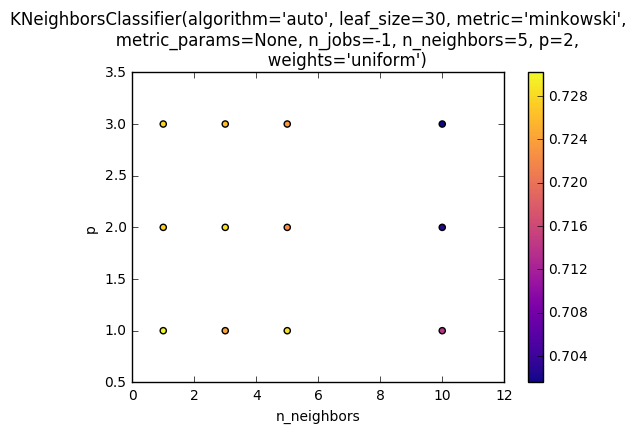

ValueError: could not convert string to float: entropy

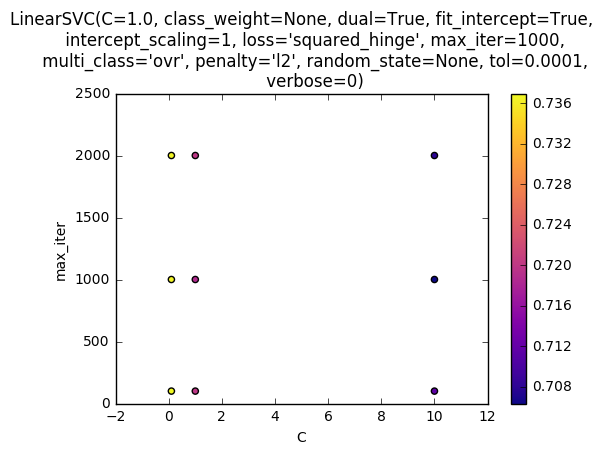

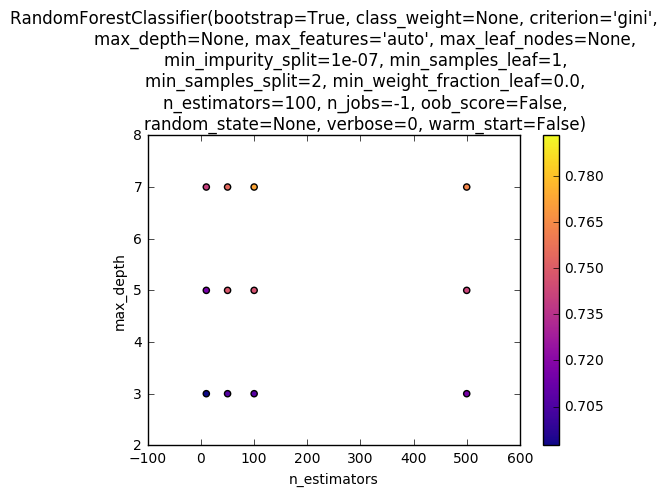

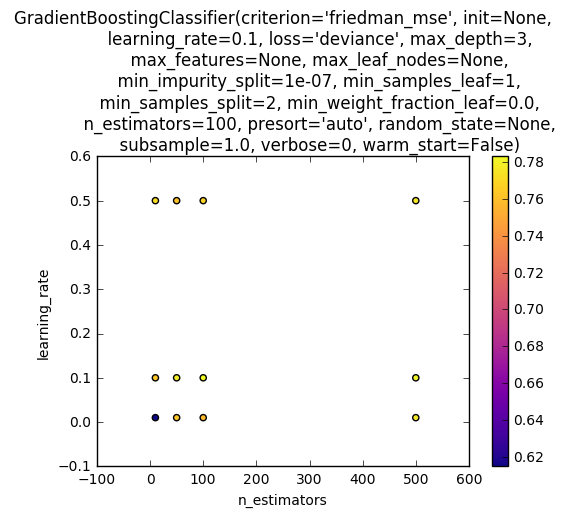

In [95]:
for i in range(len(X)):
    try:
        plt.scatter(X[i], y[i], c=res[i], cmap='plasma')
        plt.title(model[i])
        plt.xlabel(axis[i][0])
        plt.ylabel(axis[i][1])
        plt.colorbar()
        plt.show()
    except ValueError:
        plt.show()


In [96]:
X, y, res, axis, model = [], [], [], [], []
for clf, result in random_results:
    model.append(clf.estimator)
    axis.append(list(result['params'][0].keys()))
    res.append(result['mean_test_score'])
    X.append([d[axis[-1][0]] for d in result['params']])
    y.append([d[axis[-1][1]] for d in result['params']])

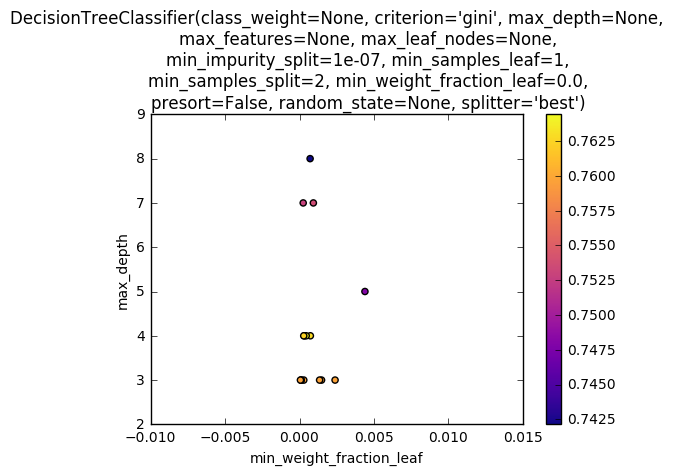

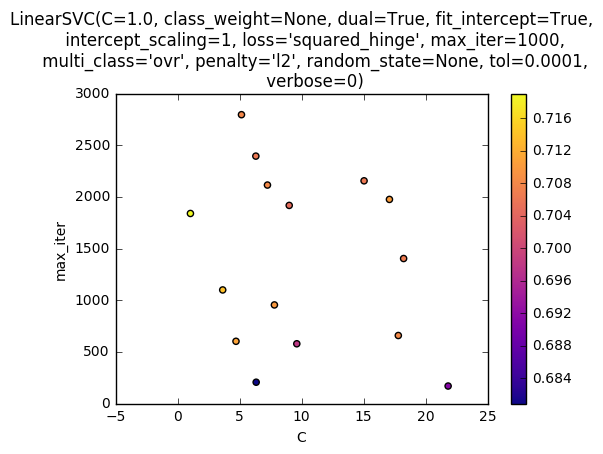

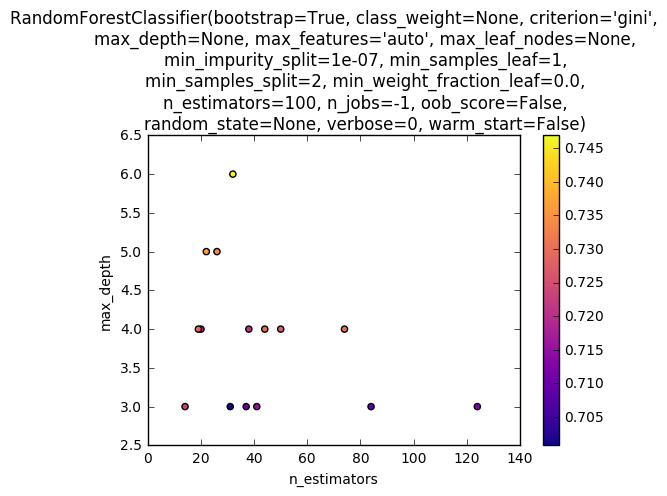

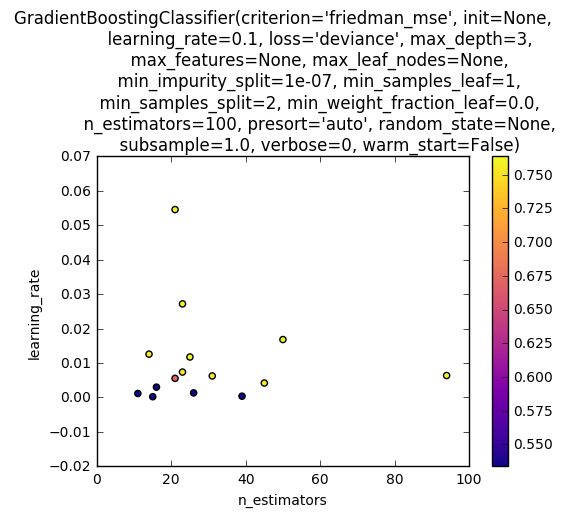

In [97]:
for i in range(len(X)):
    try:
        plt.scatter(X[i], y[i], c=res[i], cmap='plasma')
        plt.title(model[i])
        plt.xlabel(axis[i][0])
        plt.ylabel(axis[i][1])
        plt.colorbar()
        plt.show()
    except ValueError:
        plt.show()

# Извиняюсь за то, что нет KNN в RandomCV, на обучении комп упал, а я не успевал

In [98]:
930*0.2

186.0